In [159]:
import pandas as pd
from mplsoccer import Pitch,Sbopen
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager

In [100]:
parser= Sbopen()

In [101]:
df, related, freeze, tactics = parser.event(3754171)

In [102]:
df.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'match_id', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id',
       'pass_height_name', 'end_x', 'end_y', 'body_part_id', 'body_part_name',
       'sub_type_id', 'sub_type_name', 'x', 'y', 'under_pressure',
       'outcome_id', 'outcome_name', 'foul_won_defensive', 'pass_cross',
       'aerial_won', 'out', 'technique_id', 'technique_name',
       'pass_assisted_shot_id', 'pass_shot_assist', 'shot_statsbomb_xg',
       'end_z', 'shot_key_pass_id', 'goalkeeper_position_id',
       'goalkeeper_position_name', 'off_camera', 'foul_committed_advantage',
       'foul_won_advantage', 'pass_cut_back', 'pass_goal_assist

In [103]:
df = df[df['team_name']=='Arsenal']

In [104]:
df['outcome_name'].unique()

array([nan, 'Incomplete', 'Complete', 'Unknown', 'Off T', 'Goal',
       'Lost Out', 'Won', 'Out', 'Success In Play', 'Success',
       'Pass Offside', 'Lost In Play', 'In Play Safe', 'Blocked',
       'Touched Out', 'Success To Team', 'Saved', 'Tactical', 'Injury',
       'Post'], dtype=object)

In [105]:
df['type_name'].unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt', 'Carry',
       'Dribble', 'Foul Won', 'Dispossessed', 'Shot', 'Clearance', 'Duel',
       'Block', 'Pressure', 'Foul Committed', 'Miscontrol',
       'Ball Recovery', 'Dribbled Past', 'Interception', 'Goal Keeper',
       'Half End', '50/50', 'Substitution', 'Shield'], dtype=object)

In [106]:
df['player_id'].unique()

array([   nan,  3668.,  3496., 11386.,  3517.,  3475.,  3511.,  3437.,
        6746.,  3385.,  3498.,  3461.,  3604.,  3525.,  3528.])

In [109]:
filtered = passes[['player_name','x','y','end_x', 'end_y','pass_recipient_name','outcome_id','outcome_name']]

KeyError: "['player_name'] not in index"

In [110]:
filtered[filtered['outcome_name'].isnull()]

,player_name,x,y,end_x,end_y,pass_recipient_name,outcome_id,outcome_name
4,Theo Walcott,60.0,40.0,60.1,37.7,Mesut Özil,NaN,NaN
7,Mesut Özil,59.8,37.5,45.9,43.1,Santiago Cazorla González,NaN,NaN
15,Mesut Özil,77.3,46.9,84.7,55.3,Aaron Ramsey,NaN,NaN
20,Aaron Ramsey,73.9,61.1,48.2,60.5,Per Mertesacker,NaN,NaN
23,Per Mertesacker,48.4,60.5,56.2,71.6,Aaron Ramsey,NaN,NaN
...,...,...,...,...,...,...,...,...
3666,Héctor Bellerín Moruno,56.0,70.0,43.0,66.2,Per Mertesacker,NaN,NaN
3669,Per Mertesacker,44.7,65.2,55.8,78.2,Héctor Bellerín Moruno,NaN,NaN
3671,Héctor Bellerín Moruno,55.8,77.3,68.8,76.8,Alex Oxlade-Chamberlain,NaN,NaN
3673,Alex Oxlade-Chamberlain,71.4,77.5,76.0,66.6,Héctor Bellerín Moruno,NaN,NaN


In [111]:
df_lineup = parser.lineup(3754171)
jersey_data=df_lineup[['player_id','jersey_number']]

In [112]:
df= pd.merge(df,jersey_data,on='player_id')


C:\Users\lamsa\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\reshape\merge.py:1203: RuntimeWarning: invalid value encountered in cast
  if not (lk == lk.astype(rk.dtype))[~np.isnan(lk)].all():


In [113]:
#player id is the jersey number
df['passer'] = df['jersey_number']
passes = df[df['type_name']=='Pass']
successful = passes[passes['outcome_name'].isnull()]

In [126]:
rec= pd.to_numeric(successful['pass_recipient_id'],downcast='integer')
jersey_data.rename(columns={'player_id':'pass_recipient_id'},inplace=True)
jersey_data.rename(columns={'jersey_number':'pass_recipient'},inplace=True)
successful=pd.merge(df,jersey_data,on='pass_recipient_id')
successful

C:\Users\lamsa\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\lamsa\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\reshape\merge.py:1203: RuntimeWarning: invalid value encountered in cast
  if not (lk == lk.astype(rk.dtype))[~np.isnan(lk)].all():


,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,foul_committed_card_name,dribble_overrun,substitution_replacement_id,substitution_replacement_name,dribble_nutmeg,pass_no_touch,shot_one_on_one,jersey_number,passer,pass_recipient
0,5b94f3b2-d60a-4aad-be61-fa1925244d05,5,1,00:00:00.886000,0,0,2,0.342259,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,14,11
1,905afc0d-2384-448c-910c-c39b7b68a2b5,232,1,00:06:26.565000,6,26,9,0.592175,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,14,11
2,1ef570b6-68a1-44e4-ae8e-258424733376,66,1,00:00:52.391000,0,52,2,1.143783,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,19,11
3,cbccf91e-4ef8-4518-9f69-3a976fec60e1,313,1,00:09:01.188000,9,1,15,1.024242,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,19,11
4,1504c27e-e168-4894-8758-c9b3e1abbb32,833,1,00:22:24.112000,22,24,34,0.746196,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,19,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,211743e6-39c5-4ac6-8679-b22f523cb1b7,3344,2,00:36:16.633000,81,16,151,3.962653,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,33,12
389,a79bd8bb-d1c4-4919-9ffb-f082a640cae8,3541,2,00:41:20.017000,86,20,170,3.686247,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,33,12
390,7733c3a1-9587-43f4-a39e-7de90ed6c868,3734,2,00:46:29.279000,91,29,179,3.993361,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,33,12
391,ac915371-319b-48a2-81a1-801cb7c5d67b,3402,2,00:38:10.775000,83,10,155,0.181173,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,12


In [116]:
subs = df[df['type_name']=='Substitution']
subs = subs['minute']
firstSub=subs.min()

In [117]:
firstSub

74

In [118]:
successful = successful[successful['minute']<firstSub]

In [119]:
successful

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,foul_committed_card_name,dribble_overrun,substitution_replacement_id,substitution_replacement_name,dribble_nutmeg,pass_no_touch,shot_one_on_one,jersey_number,passer,pass_recipient
0,5b94f3b2-d60a-4aad-be61-fa1925244d05,5,1,00:00:00.886000,0,0,2,0.342259,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,14,11
1,905afc0d-2384-448c-910c-c39b7b68a2b5,232,1,00:06:26.565000,6,26,9,0.592175,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,14,11
2,1ef570b6-68a1-44e4-ae8e-258424733376,66,1,00:00:52.391000,0,52,2,1.143783,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,19,11
3,cbccf91e-4ef8-4518-9f69-3a976fec60e1,313,1,00:09:01.188000,9,1,15,1.024242,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,19,11
4,1504c27e-e168-4894-8758-c9b3e1abbb32,833,1,00:22:24.112000,22,24,34,0.746196,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,19,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,84bdf6e1-e125-4243-a4c1-3f4dea386030,568,1,00:15:07.030000,15,7,26,2.004195,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,33
381,ea82f503-82eb-4fae-bb95-abbd044e3b80,1192,1,00:29:44.257000,29,44,47,2.461485,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,33
382,83895ef7-553a-4313-9ab4-cd1a8ae1b0a9,2281,2,00:09:42.722000,54,42,99,3.566446,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,33
383,0eee7fb5-a9f3-41ab-be51-1a224f417beb,2921,2,00:24:41.089000,69,41,129,0.061137,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,33


In [120]:
successful.dtypes


id                 object
index               int64
period              int64
timestamp          object
minute              int64
                    ...  
pass_no_touch      object
shot_one_on_one    object
jersey_number       int64
passer              int64
pass_recipient      int64
Length: 74, dtype: object

C:\Users\lamsa\AppData\Local\Temp\ipykernel_9248\2274507562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful['passer']=pas
C:\Users\lamsa\AppData\Local\Temp\ipykernel_9248\2274507562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful['recipient']=rec


In [73]:
successful

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,foul_committed_card_id,foul_committed_card_name,dribble_overrun,substitution_replacement_id,substitution_replacement_name,dribble_nutmeg,pass_no_touch,shot_one_on_one,passer,recipient
4,5b94f3b2-d60a-4aad-be61-fa1925244d05,5,1,00:00:00.886000,0,0,2,0.342259,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3668,3496
7,320f2368-be42-447e-ae0c-6e6351e88919,8,1,00:00:01.383000,0,1,2,0.905431,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496,11386
15,38810a5c-c419-4e71-85e5-b1460556ec42,16,1,00:00:08.495000,0,8,2,0.732097,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496,3517
20,29345179-44ae-4804-a85b-167bbbf2ed58,21,1,00:00:12.185000,0,12,2,2.405393,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3517,3475
23,3243353b-49ad-4f83-9938-709c563f3813,24,1,00:00:14.779000,0,14,2,1.126566,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3475,3517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047,a34934c9-3772-48ab-bde0-bd366bea2433,3048,2,00:27:58.484000,72,58,136,1.042920,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11386,3517
3050,6bf44147-aefe-42bc-b02d-8d9a8ed33430,3051,2,00:28:01.988000,73,1,136,1.209362,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3517,3475
3053,bf992e90-c2bb-4cdb-8d10-b07310e4a529,3054,2,00:28:05.977000,73,5,136,1.330412,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3475,6746
3057,2b9876ee-be79-49c4-885c-38477f026a14,3058,2,00:28:07.551000,73,7,136,1.035535,3754171,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6746,3498


In [75]:
df['pass_recipient_id'].unique()

array([   nan,  3496., 11386.,  3517.,  3475.,  3511.,  3437.,  6746.,
        3385.,  3668.,  3498.,  3461.,  3604.,  3525.,  3528.])

In [121]:
average_locations= successful.groupby('passer').agg({'x':['mean'],'y':['mean','count']})
average_locations.columns = ['x','y','count']

In [122]:
average_locations

,x,y,count
passer,,,
4,38.873171,56.746341,41
5,32.787879,24.342424,33
11,69.744737,43.218421,38
14,80.518182,51.427273,11
16,53.076744,58.527907,43
17,73.800000,22.375000,20
18,49.003846,11.050000,26
19,50.238462,43.853846,52
24,49.976667,69.673333,30


In [134]:
pass_between = successful.groupby(['passer','pass_recipient']).id.count().reset_index()
pass_between.rename({'id':'pass_count'},axis='columns',inplace=True)
pass_between

,passer,pass_recipient,pass_count
0,3,16,1
1,4,5,6
2,4,11,3
3,4,14,4
4,4,16,7
...,...,...,...
97,34,16,3
98,34,17,3
99,34,18,2
100,34,19,8


In [135]:
pass_between= pass_between.merge(average_locations,left_on='passer',right_index=True)
pass_between


,passer,pass_recipient,pass_count,x,y,count
1,4,5,6,38.873171,56.746341,41
2,4,11,3,38.873171,56.746341,41
3,4,14,4,38.873171,56.746341,41
4,4,16,7,38.873171,56.746341,41
5,4,17,1,38.873171,56.746341,41
...,...,...,...,...,...,...
97,34,16,3,54.003333,49.183333,30
98,34,17,3,54.003333,49.183333,30
99,34,18,2,54.003333,49.183333,30
100,34,19,8,54.003333,49.183333,30


In [137]:
pass_between= pass_between.merge(average_locations,left_on='pass_recipient',right_index=True,suffixes=['','_end'])
pass_between

,passer,pass_recipient,pass_count,x,y,count,x_end,y_end,count_end
1,4,5,6,38.873171,56.746341,41,32.787879,24.342424,33
19,11,5,1,69.744737,43.218421,38,32.787879,24.342424,33
39,16,5,5,53.076744,58.527907,43,32.787879,24.342424,33
56,18,5,5,49.003846,11.050000,26,32.787879,24.342424,33
66,19,5,3,50.238462,43.853846,52,32.787879,24.342424,33
...,...,...,...,...,...,...,...,...,...
38,16,4,9,53.076744,58.527907,43,38.873171,56.746341,41
65,19,4,5,50.238462,43.853846,52,38.873171,56.746341,41
75,24,4,2,49.976667,69.673333,30,38.873171,56.746341,41
84,33,4,5,12.048148,40.218519,27,38.873171,56.746341,41


In [138]:
pass_between =pass_between[pass_between['pass_count']>3]

In [139]:
pass_between

,passer,pass_recipient,pass_count,x,y,count,x_end,y_end,count_end
1,4,5,6,38.873171,56.746341,41,32.787879,24.342424,33
39,16,5,5,53.076744,58.527907,43,32.787879,24.342424,33
56,18,5,5,49.003846,11.050000,26,32.787879,24.342424,33
40,16,11,5,53.076744,58.527907,43,69.744737,43.218421,38
48,17,11,5,73.800000,22.375000,20,69.744737,43.218421,38
57,18,11,5,49.003846,11.050000,26,69.744737,43.218421,38
67,19,11,8,50.238462,43.853846,52,69.744737,43.218421,38
77,24,11,6,49.976667,69.673333,30,69.744737,43.218421,38
86,33,11,6,12.048148,40.218519,27,69.744737,43.218421,38
95,34,11,4,54.003333,49.183333,30,69.744737,43.218421,38


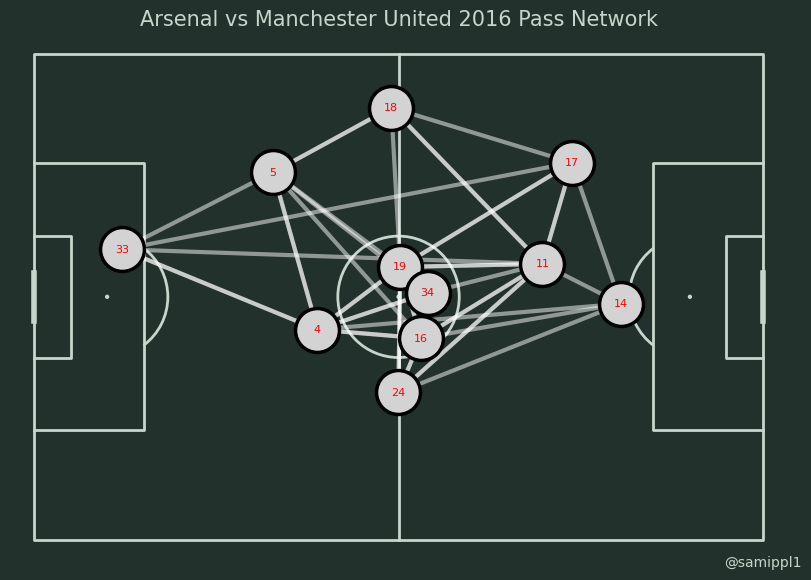

In [196]:
# Set the figure size
fig, ax = pitch.draw(figsize=(8, 6), constrained_layout=True, tight_layout=False)

# Set the face color of the figure
fig.set_facecolor('#22312b')

# Draw arrows and nodes
arrows = pitch.arrows(1.2 * pass_between.x, 0.8 * pass_between.y, 1.2 * pass_between.x_end, 0.8 * pass_between.y_end, ax=ax, width=3, headwidth=3, color='white', zorder=1, alpha=0.5)
nodes = pitch.scatter(1.2 * average_locations.x, 0.8 * average_locations.y, s=1000, color='#d3d3d3', edgecolors='black', linewidth=2.5, alpha=1, zorder=1, ax=ax)

# Annotate average_locations
for index, row in average_locations.iterrows():
    pitch.annotate(index, xy=(1.2 * row.x, 0.8 * row.y), c='red', va='center', ha='center', size=8, ax=ax)

# Add the endnote
ax.text(120, 85, '@samippl1', color='#c7d5cc', va='bottom', ha='center', fontsize=10)

# Add the title
ax.set_title('Arsenal vs Manchester United 2016 Pass Network', color='#c7d5cc', va='center', ha='center', fontsize=15)

# Show the plot
plt.show()


In [149]:
nodes.

AttributeError: 'PathCollection' object has no attribute 'unique'